# IS 4487 Assignment 5: Exploratory Data Analysis (EDA) with Stakeholder Framing

In this assignment, you will:
- Load and explore a hotel bookings dataset
- Identify stakeholder needs and frame your analysis around business goals
- Practice data summarization and visualization
- Draw insights that could lead to actionable business recommendations

## Why This Matters

These skills are essential for business majors and minors working in areas like marketing, operations, finance, or consulting. Understanding how to explore and communicate data-driven insights helps you make better decisions and contribute to real-world business outcomes.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_05_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.


## 1. Setup and Data Loading

Instructions:
- Import `pandas`, `seaborn`, and `matplotlib.pyplot`.
- Load the dataset from this URL:
  https://github.com/Stan-Pugsley/is_4487_base/blob/d764a81fe649c397a1f5b35f1e1ceda48b5178d1/DataSets/hotels.csv?raw=true
- Display the first few rows to confirm it loaded correctly.


In [1]:
import pandas as pd


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. Stakeholder and Business Context

Business framing:  

Every analysis should serve a decision-maker. Before you explore the data, identify who cares about hotel booking behavior and what they might want to know. Your analysis should be framed around those needs.

### In your markdown:
1. Who are the key stakeholders for this dataset?
2. What goals might each stakeholder have?
3. What is a clear, specific business problem statement that this data can help answer?





1. Hotels and travel booking agencies care about hotel booking behavior. The owners of these businesses want to know where reservations are being made so they know how to better serve customers.

2. Both of these stakeholders want to know how to maximize profit, and what type of property they should be focused on, whether it is a city hotel or resort hotel. The hotels want to know what type of customer they are servicing, and what their general needs are. They also want to know what rooms they are selling the most.

3. A business problem that this data can help to solve is improving forecasting, so that hotels/resorts know what type of customer they can expect, and how they will likely behave.




## 3. Explore Data Structure and Quality

Business framing:  

Before diving into analysis, analysts need to understand the shape and health of the data. Bad data leads to bad decisions.

- Perform the following 3 checks to see the data quality:
  - Summary the data (e.g., `.info()`, `.describe()`)
  - Find the number of Null values
  - Find the number of duplicate row checks
- Flag any issues you notice (e.g., missing values, formatting problems)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Number of duplicate rows: 31994


### In your markdown:
1. What structural issues or problems did you find?
2. What actions would you recommend to clean or prepare this dataset for use?


 There are 31,994 duplicate rows in this dataset. There are also 488 missing values for the "country" variable.

 I would go through and eliminate the duplicate rows so the data is clean, and not redundant. I would also eliminate the 488 entries missing a country. The other variables with a high null count, such as company and agent, make sense. Not everyone is traveling with a company or booked through an agent. I would leave these as they are.



## 4. Univariate Analysis

Business framing:  

Hotels care about trends like average stay length, customer mix, and pricing. A good EDA starts with understanding single variables and their distribution.

- Select at least 3 individual variables to explore
- Use plots and summary methods (e.g. info(), describe(), etc)  to describe the distribution (hint: we are only looking at the values of one variable, so think of plots you've used in the past that DON'T compare 2 variables.)
- Focus on what matters from a business standpoint (e.g., pricing, cancellations, guest types)

,customer_type
count,119390
unique,4
top,Transient
freq,89613


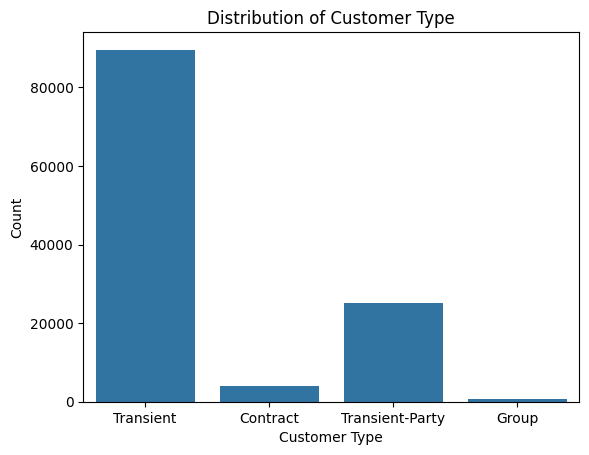

,is_canceled
count,119390.000000
mean,0.370416
std,0.482918
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


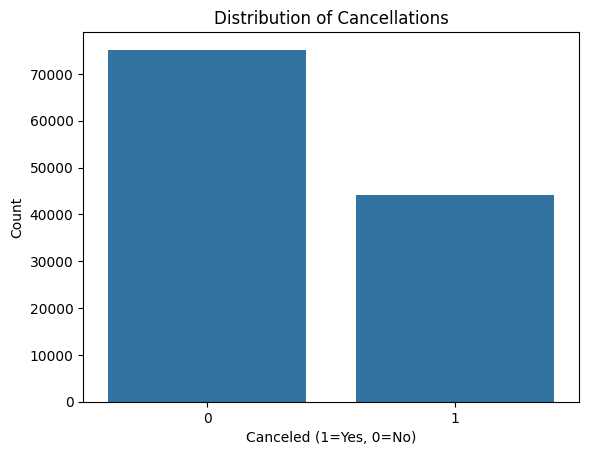

,total_of_special_requests
count,119390.000000
mean,0.571363
std,0.792798
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,5.000000


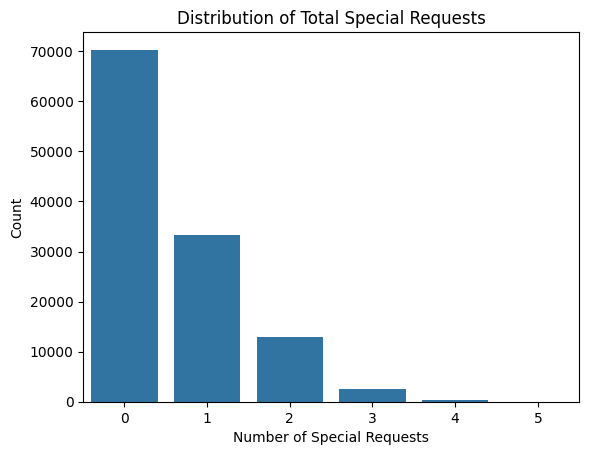

### In your markdown:
1. Variable 1 – What did you explore and what did you find?
2. Variable 2 – What did you explore and what did you find?
3. Variable 3 – What did you explore and what did you find?


The first variable I looked at was customer type. The vast majority of customers were transient, meaning they stayed for a short period, and booking directly through the hotel. A tiny percentage of customers traveled with a group.

The second variable I looked at was number of cancellations. Most customers did not cancel, but about 45,000 did, which roughly 1/3rd of all guests. This is a lot of cancellations.

The third variable I looked at was the number of special requests made. This is good for hotels/travel agents to know for planning purposes. The majority of guests made no special requests. The average number of special requests made per guest is 0.57, meaning that most do not make a special request. Roughly a third of guests made one special request. A tiny sliver of guests made three or more special requests.


## 5. Bivariate Analysis

Business framing:  

Stakeholders often ask: “What drives cancellations?” or “Do longer stays mean higher revenue?” Bivariate analysis helps you uncover those kinds of relationships.

- Choose 2 relevant variable pairs (e.g., `lead_time` vs. `is_canceled`, or `adr` vs. `customer_type`)
- Use scatterplots, grouped bar plots, or boxplots to explore the relationships
- Interpret what these relationships could mean for the hotel business

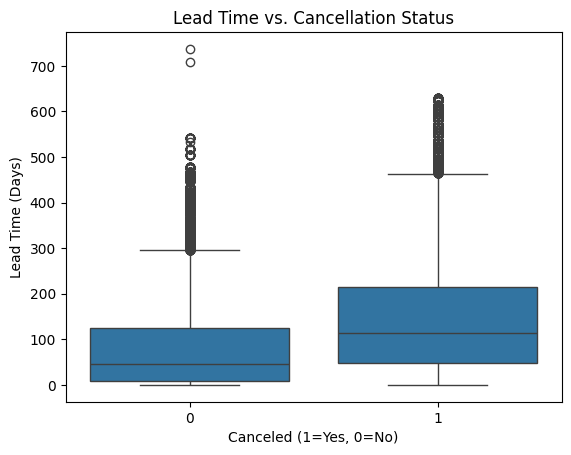

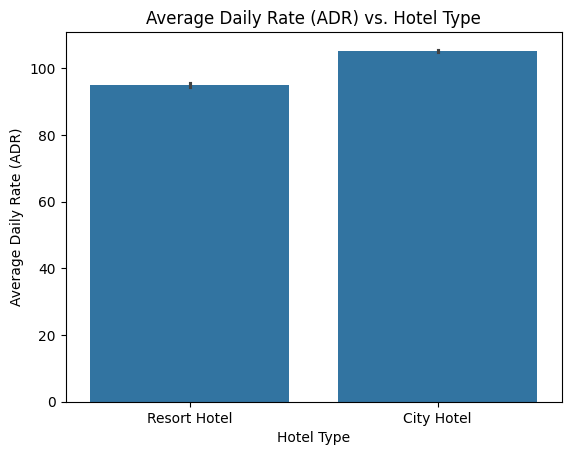

In [19]:
sns.barplot(data=df, x='hotel', y='adr')
plt.title('Average Daily Rate (ADR) vs. Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

### In your markdown:
1. Relationship 1 – What did you analyze and what insights did you find?
2. Relationship 2 – What did you analyze and what insights did you find?




In the first chart, I analyzed the relationship between lead time and cancellation status. I found that canceled hotel stays tended to have a longer lead time than stays that were not canceled. This means that the more lead time a customer gives a hotel, the more likely they are to cancel. The average lead time for canceled stays was around 100 days, whereas the average lead time for stays that were not canceled was about 50 days. This is a big difference.

In the second chart, I analyzed the relationship between average daily rate and hotel type. I found that city hotels have a higher average rate than resort hotels. The city hotel average rate was just over 100, while the resort hotel average rate was about 95. This surprised me; I expected resort hotels to be significantly more expensive.

## 6. Problem Complexity and Analytics Framing

Business framing:  

Let’s say you found a strong trend — maybe high lead times predict cancellations, or certain channels bring repeat guests. What kind of problem is this?

- Choose one insight from your earlier analysis
- Reflect on:
  - What type of complexity this problem represents (e.g., variety, volume, variability)
  - What kind of analytics would help solve or explain it (descriptive, diagnostic, predictive, prescriptive)

### In your markdown:
1. What was your selected insight?
2. What kind of complexity does it involve?
3. What type of analytics would help, and why?



I found that lead times predict cancellations. Specifically, the longer the lead time, the more likely a guest is to cancel. This logically makes sense, and the data supports it.

This problem represents variability quite well. It represents variability beacuse a hotel is never quite sure if someone will cancel or not, and has to make educated guesses as to how many guests will cancel.

Predictive analytics would help solve/explain this problem. In my previous analysis, I touched on predictive analytics, as I used lead time as a way to roughly predict cancellations. I found that guests that did not cancel had an average lead time of about fifty days, while guests that did cancel had an average lead time of over one hundred days. More intensive predictive analytics would help explain this problem in greater detail. Perhaps there is another variable that is even more predictive of cancellations than lead time.


## 7. Final Takeaways and Recommendations

Business framing:  

Imagine you’re preparing for a stakeholder meeting. What would you highlight from your findings?

- Identify your top 2–3 insights or patterns
- Connect each to a stakeholder need or business goal
- Make one recommendation based on the analysis

### In your markdown:
1. What patterns or trends stood out?
2. How do they connect to stakeholder goals?
3. What recommendation would you make based on this analysis?
4. How does this relate to your customized learning outcome you created in canvas?



One of my top insights is that lead times are strongly correlated with cancellations. The longer the lead time, the more likely a guest is to cancel. My other top insight is that city hotels have slightly higher average daily rates compared to resort hotels.

These two insights strongly connect to the stakeholder goalof revenue/profit. First of all, if lead time can help predict how likely a guest is to cancel, hotels can plan better, and perhaps slightly overbook rooms to maximize profits. Conversely, they could change their refund policy to protect revenue from canceled reservations. Knowing that city hotels have slightly higher average daily rates than resort hotels, the hotel companies could advertise these city hotels more heavily and attract more customers to them. This would increase revenue more than advertising resort hotels, because they have higher average rates. Using these insights, hotel companies can maximize revenue and profit.

Based on my analysis, I would recommend that hotels slightly overbook hotel rooms. They could see how many guests have long lead times, and look at past cancellation history to get an idea of how many rooms will likely be canceled. They could then overbook by at least a few rooms to make sure the hotel is as full as possible. I would also recommend that hotels look into changing their trip refund policy, since cancellations are so common. They could implement policies such as "no refunds for cancellations 7 or less days before check-in date." This would help protect that revenue that would be lost/refunded otherwise.

In my customized learning outcome, I specifically mentioned the hospitality industry, and wanting to be able to analyze hotel booking behavior. I think this assignment has been super cool because it showed me that analyzing these things really isn't that complicated. I also mentined applying predictive analytics to booking scenarios, which is what I did here. This assignment has been very beneficial for my learning.



## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas


In [20]:
!jupyter nbconvert --to html "assignment_05_eda.ipynb"

[NbConvertApp] Converting notebook assignment_05_eda.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 465373 bytes to assignment_05_eda.html
